In [10]:
import numpy as np
import time
import platform
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt

In [7]:
print(f'Pytorch version: {torch.__version__}')
print(f'cuda version: {torch.version.cuda}')
print(f'Python version: {platform.python_version()}')

Pytorch version: 2.4.0
cuda version: 12.4
Python version: 3.10.14


In [8]:
# Device will determine whether to run the training on GPU or CPU.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

## Load data and normalize

### Normalization


In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

Normalization adjusts the values of the image tensors using the following formula:

 $X_{normalized}$ = $\frac{X - \mu}{\sigma}$


where:

- X is the value of each pixel in the image.
- is the mean of the pixel values, which in this case is 0.5.
- σ is the standard deviation, also 0.5 in this case.

shifts the values to the range [-1, 1].

### Data splitting and more

In [16]:
train_dataset = MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [82]:
print("Training size:", len(train_dataset))
print("Test size:", len(test_dataset))

Training size: 60000
Test size: 10000


In [75]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

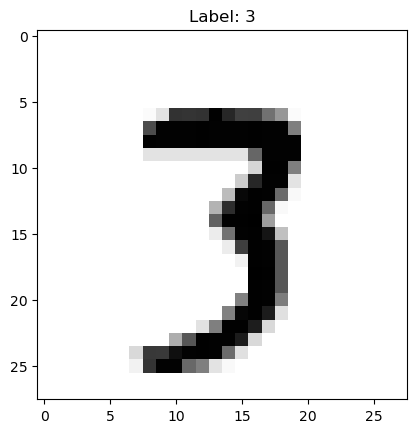

In [76]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')
plt.title(f"Label: {labels[0].item()}")
plt.show()

In [84]:
images[0].shape

torch.Size([1, 28, 28])

In [79]:
images[0].unique()

tensor([-1.0000, -0.9686, -0.9529, -0.8980, -0.8510, -0.7804, -0.7725, -0.7569,
        -0.7020, -0.6784, -0.6000, -0.5059, -0.4745, -0.4039, -0.3569, -0.2392,
        -0.1843, -0.0118,  0.0039,  0.0196,  0.0980,  0.1059,  0.1608,  0.1843,
         0.2000,  0.2314,  0.3176,  0.3255,  0.4039,  0.4980,  0.5059,  0.5137,
         0.5451,  0.5529,  0.5922,  0.6000,  0.6471,  0.6941,  0.7725,  0.7804,
         0.8353,  0.8824,  0.9294,  0.9529,  0.9765,  0.9843,  1.0000])

## LeNet-5 Network

In [83]:
# LeNet-5 (original architecture)
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(16*4*4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, 2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, 2)
        x = x.view(-1, 16*4*4)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x